In [1]:
import pandas as pd
crime_data = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')

In [2]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
crime_data.dtypes


ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
crime_data.shape

(6836023, 22)

 ### Graphs 
 
 #### Graph 1 : %crimes by location description (10 most common locations) 
 #### Graph 2 : %crimes by crime type (10 most common crime types) 
 #### Graph 3 : %crimes by Description 
 #### Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes
 #### Graph 6: Top ten places that an arrest is likely to occur in Chicago
 #### Graph 7 : Number of crimes by year for top 10 crime types

Text(0,0.5,'Percentage of Crimes')

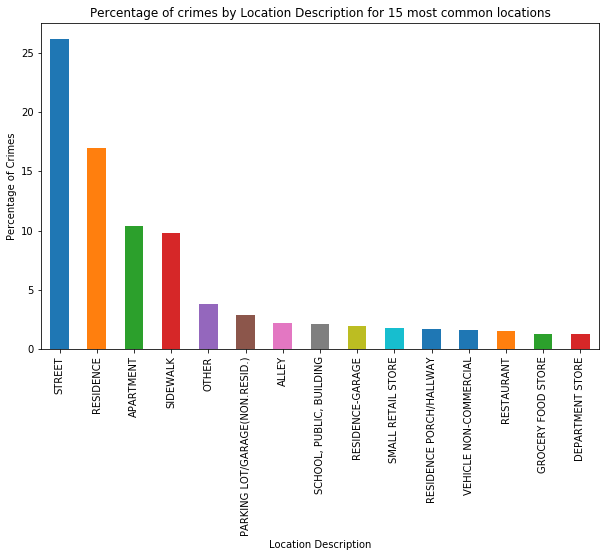

In [5]:
# Graph 1 : %crimes by location description (10 most common locations) 

import matplotlib.pyplot as plt
%matplotlib inline
percent = crime_data['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')


Text(0,0.5,'Percentage of Crimes')

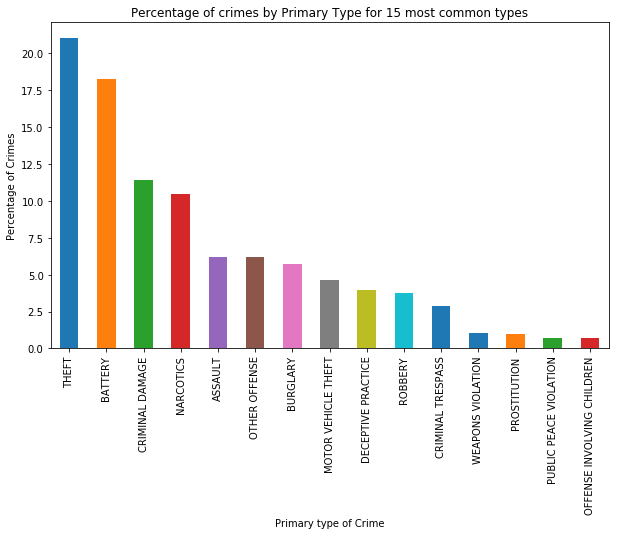

In [6]:
# Graph 2 : %crimes by crime type (10 most common crime types) 
percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

Text(0,0.5,'Percentage of Crimes')

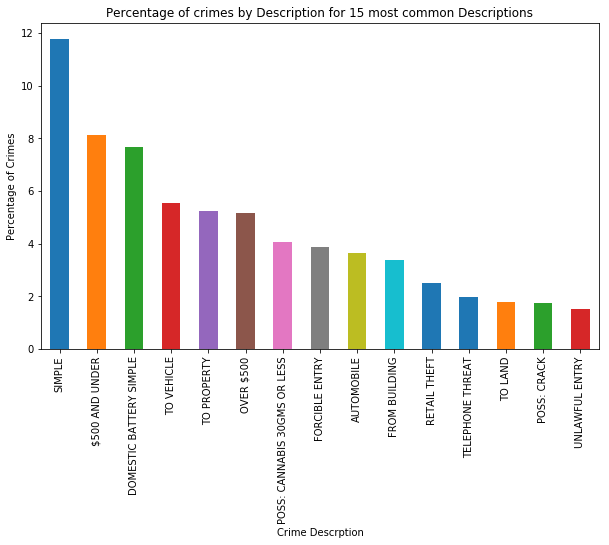

In [7]:
# Graph 3 : %crimes by Description 

percent = crime_data['Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Description for 15 most common Descriptions') 
ax.set_xlabel('Crime Descrption')
ax.set_ylabel('Percentage of Crimes')

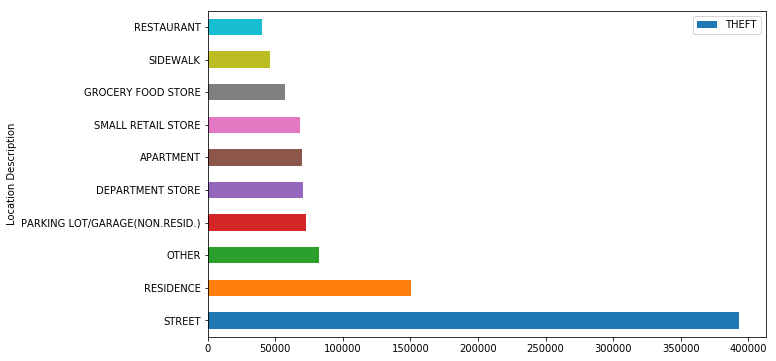

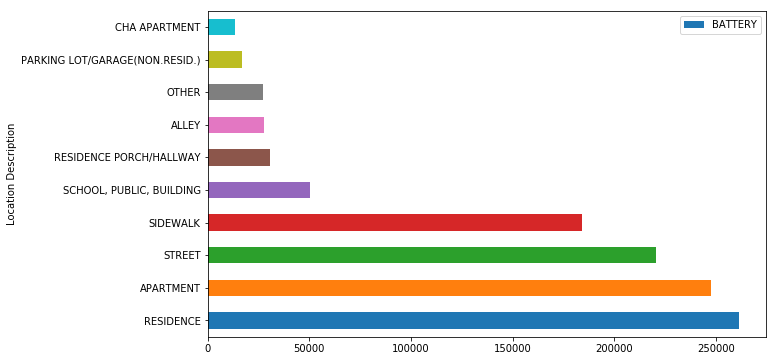

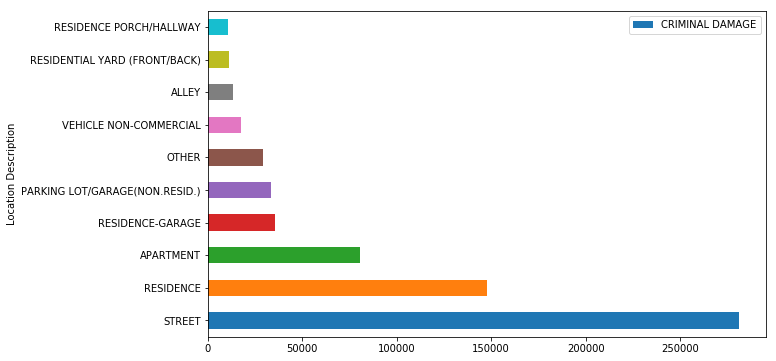

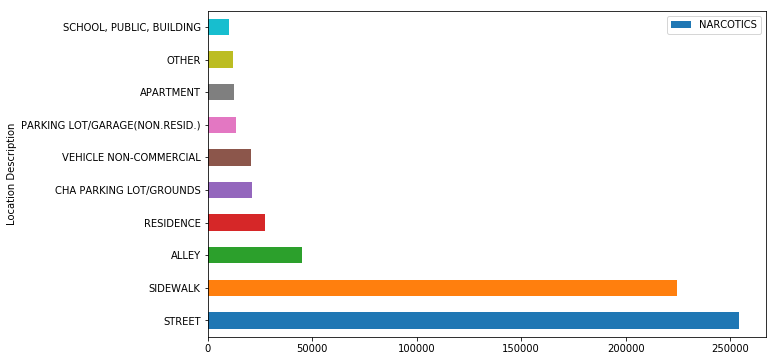

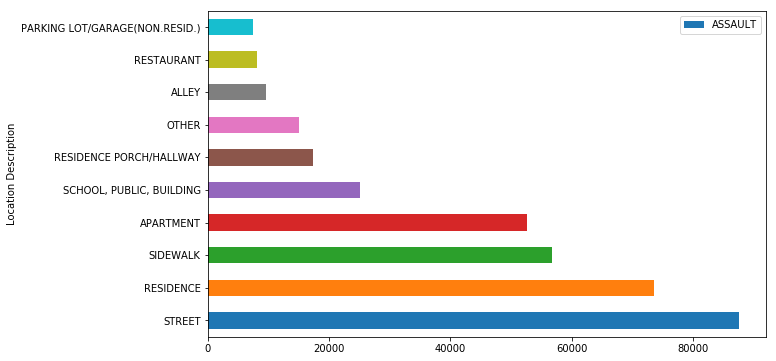

In [8]:
# Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes
import numpy as np
import seaborn as sns
location_by_type  = crime_data.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
columns =  location_by_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[row].sort_values(ascending= False)[:10].plot(kind='barh').legend()
   

for col in columns:
    plot_pivot_location_by_type(location_by_type,col)


    

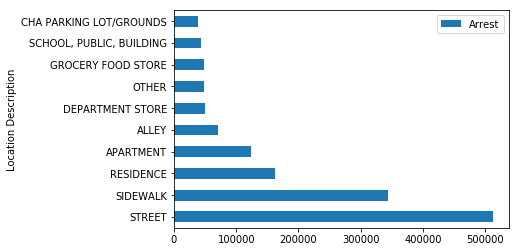

In [9]:
#Graph 6: Top ten places that an arrest is likely to occur in Chicago
foo = crime_data[['Location Description','Arrest']].groupby('Location Description').sum(axis=1).sort_values(by = 'Arrest',ascending = False)[:10]
foo.plot(kind='barh')


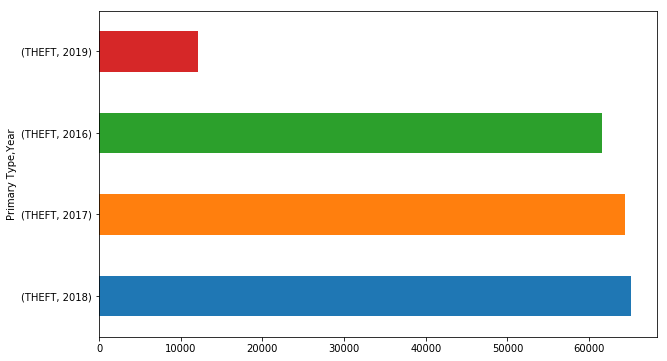

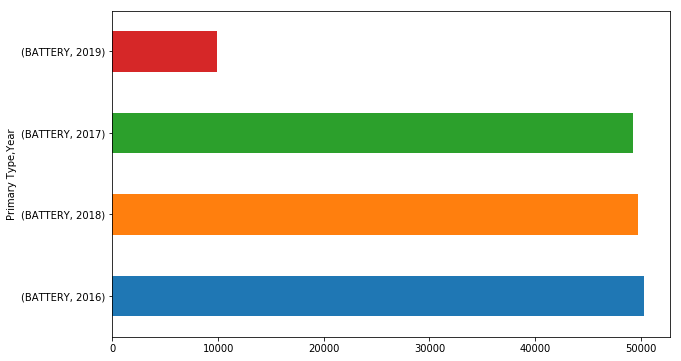

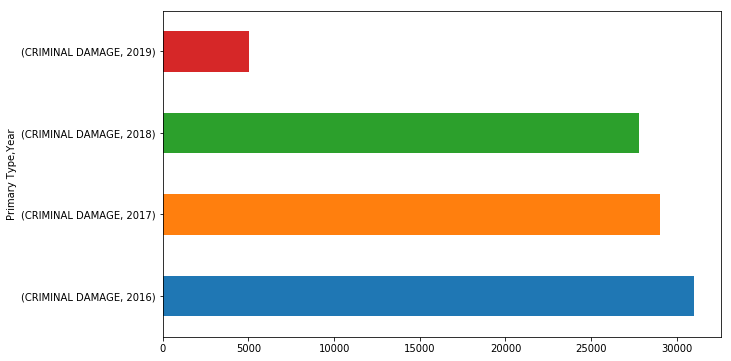

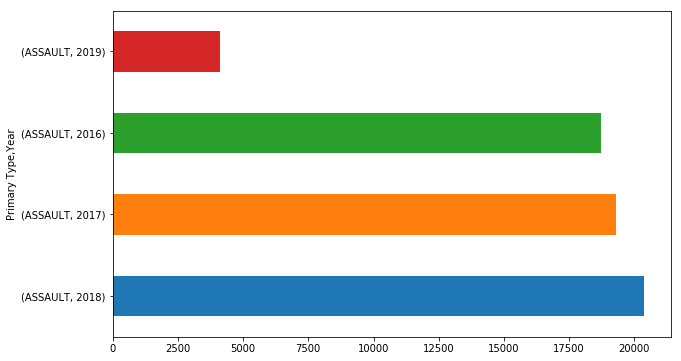

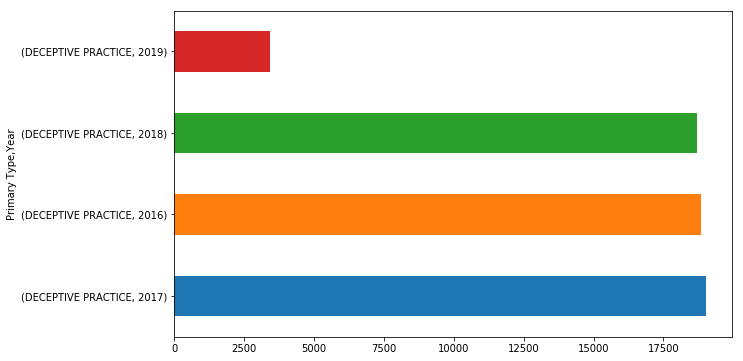

In [10]:
# Graph 7 : Number of crimes by year for top 10 crime types
year = crime_data['Year']
arrests_by_year_type = crime_data[crime_data['Year']>2015]
arrests_by_year_type = arrests_by_year_type.pivot_table('Arrest',index = 'Year',columns = 'Primary Type',aggfunc=np.size)
columns =  arrests_by_year_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[[row]].sort_values(ascending= False)[:10].plot(kind='barh')

for col in columns:
    plot_pivot_location_by_type(arrests_by_year_type.unstack(),col)





### Data Processing

In [11]:
#picking primary types with > 5000 samples
primary_type = crime_data['Primary Type'].value_counts()[:23].keys()
crime_data = crime_data.loc[crime_data['Primary Type'].isin(primary_type)] 


In [12]:
# Converting 'Date' to datetime format
date_format = '%m/%d/%Y %I:%M:%S %p'
crime_data['Date'] = pd.to_datetime(crime_data['Date'].astype(str), format =date_format)

In [13]:
#checking number of features by category
categorical = ['District','Description','Location Description']

print('number of categorical datapoints by category')
for cat in categorical:    
    print(cat + " : "+ str(len(crime_data[cat].value_counts())) )



number of categorical datapoints by category
District : 24
Description : 350
Location Description : 179


In [14]:
#Encoding categorical features
# categorical = ['District','Description','Location Description']
# prefixes =  ['District_','Description_','Location Description_']
# dummies = pd.get_dummies(crime_data, columns= categorical, prefix = prefixes)



In [15]:
# Data processing 

unused = ['Beat','Community Area','Case Number','District','FBI Code','ID','Location','Updated On','Ward']
text_features = ['Description','Location Description']


features = [col_name for col_name in crime_data if (col_name != 'Primary Type') and (col_name not in unused)]


crime_data_non_categorical = crime_data[[col for col in crime_data if col not in categorical]]

crime_data = pd.concat([crime_data_non_categorical, dummies], axis=1) 

NameError: name 'dummies' is not defined

In [16]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
# Model Functions 
def evaluate_model(model,X_test,y_test):
    y_predicted = model.predict(X_test)
    model_score = model.score(X_test,y_test) 
    recall_score = metrics.recall_score(y_test,y_predicted)
    accuracy_score = metrics.accuracy_score(y_test,y_predicted)
    precision_score = metrics.precision_score(y_test,y_predicted)   
    
    print('model score : ' + str(model_score) )
    print('accuracy score : ' + str(accuracy_score))
    print('precision score : ' + str(precision_score)  )
    print('recall score : ' + str(recall_score))
    print(metrics.confusion_matrix(y_test,y_predicted))

def test_model(model,features):
    X = crime_data[features]
    y = crime_data['Primary Type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    model.fit(X_train,y_train)
    evaluate_model(model,X_test,y_test)   

In [ ]:
# Model : Random Forest




X = crime_data[features]
y = crime_data['Primary Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# test_model(random_forest,features)

In [ ]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier()

random_forest.fit(X_train,y_train)



In [ ]:

for col in X:    
    print(crime_data[[col]].sample(n=1))


In [ ]:
crime_data['Description'].value_counts()[:98].sort_values()
